<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dataset-and-clean" data-toc-modified-id="Import-dataset-and-clean-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import dataset and clean</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Group-Risk-Factors" data-toc-modified-id="Group-Risk-Factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Group Risk Factors</a></span></li><li><span><a href="#Indicator-availability-over-years" data-toc-modified-id="Indicator-availability-over-years-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Indicator availability over years</a></span></li><li><span><a href="#Handle-Disagregation" data-toc-modified-id="Handle-Disagregation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Handle Disagregation</a></span><ul class="toc-item"><li><span><a href="#NCD-Risk-Factor" data-toc-modified-id="NCD-Risk-Factor-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>NCD Risk Factor</a></span></li><li><span><a href="#Metabolic-Risk-Factor" data-toc-modified-id="Metabolic-Risk-Factor-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Metabolic Risk Factor</a></span></li><li><span><a href="#Other-Risk-Factor" data-toc-modified-id="Other-Risk-Factor-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Other Risk Factor</a></span></li></ul></li><li><span><a href="#Change-rates-to-number" data-toc-modified-id="Change-rates-to-number-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Change rates to number</a></span><ul class="toc-item"><li><span><a href="#Metabolic-Risk-Factor" data-toc-modified-id="Metabolic-Risk-Factor-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Metabolic Risk Factor</a></span></li></ul></li><li><span><a href="#Correlations-of-indicators-of-risk-factors" data-toc-modified-id="Correlations-of-indicators-of-risk-factors-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Correlations of indicators of risk factors</a></span><ul class="toc-item"><li><span><a href="#Metabolic-Risk-Factor" data-toc-modified-id="Metabolic-Risk-Factor-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Metabolic Risk Factor</a></span></li><li><span><a href="#Behavorial-Risk-Factor" data-toc-modified-id="Behavorial-Risk-Factor-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Behavorial Risk Factor</a></span></li><li><span><a href="#NCD-Risk-Factor" data-toc-modified-id="NCD-Risk-Factor-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>NCD Risk Factor</a></span></li><li><span><a href="#Missing-countries" data-toc-modified-id="Missing-countries-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Missing countries</a></span></li></ul></li></ul></li><li><span><a href="#Methods-to-assign-scores" data-toc-modified-id="Methods-to-assign-scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods to assign scores</a></span><ul class="toc-item"><li><span><a href="#Percentage-Binning" data-toc-modified-id="Percentage-Binning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Percentage Binning</a></span></li><li><span><a href="#Check-Distribution" data-toc-modified-id="Check-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check Distribution</a></span></li><li><span><a href="#Add-labels:-above/below-average" data-toc-modified-id="Add-labels:-above/below-average-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add labels: above/below average</a></span></li></ul></li><li><span><a href="#Max-Min-score-(ex:-asthma)" data-toc-modified-id="Max-Min-score-(ex:-asthma)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Max Min score (ex: asthma)</a></span></li></ul></div>

In [ ]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1
# https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

## Import dataset and clean

### Import data

In [ ]:
import pandas as pd
df = pd.read_csv('covid19- merged risk factors-v2-06May20.csv')

In [ ]:
print('There are {} rows in the imported dataset'.format(df.shape[0]))

In [ ]:
print('there are {} unique indicators in the imported dataset in total'.format(df['Indicator'].nunique()))

In [ ]:
print('colums imported and their datatypes')
df.dtypes

In [ ]:
df.head()

### Group Risk Factors

In [ ]:
groups=[]
for i in df['Indicator']:
    if i in ('Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized',
             'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
             'Current cigarette smoking, age-standardised',
             'Current tobacco smoking, age-standardised',
             'Daily cigarette smoking, age-standardised',
             'Daily tobacco smoking, age-standardised'):
        groups.append('Behavioral Risk Factor')
    elif i in ('Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
               'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years',
               'Stunting - height-for-age (<-2SD)',
               'Interstitial lung disease and pulmonary sarcoidosis prevalence rate',
               'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
               'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)'):
        groups.append('Metabolic Risk Factor')
    elif i in ('Chronic obstructive pulmonary disease prevalence rate',
               'Chronic respiratory diseases prevalence rate',
               'Asthma prevalence rate',
               'Other chronic respiratory diseases prevalence rate',
               'Pneumoconiosis prevalence rate',
               'Estimated number of new cases, all cancers, all ages (crude-estimate)',
               'Diabetes prevalence',
               'Cancer prevalence',
               'Cardiovascular diseases prevalence'):
        groups.append('NCD Prevalence Rate')
    elif i in ('Concentrations of fine particulate matter (PM2.5)',
               'Total population by five-year age group (thousands)'):
        groups.append('Other')
    else:
        groups.append('')
        
df['Risk Factor']=groups

In [ ]:
df_other = df[(df['Risk Factor'] != 'NCD Prevalence Rate') 
   & (df['Risk Factor'] != 'Metabolic Risk Factor') 
   & (df['Risk Factor'] != 'Behavioral Risk Factor')
 & (df['Risk Factor'] != 'Other')]
df_other['Risk Factor'].unique()

In [ ]:
print('Drop the following indicators that are not to be included in any risk factor analysis:')
dropi = df[df['Risk Factor'] ==''].index
df.iloc[dropi,:]['Indicator'].unique()

In [ ]:
df.drop(dropi, inplace=True)

In [ ]:
print('The dataset is reduced to {} rows.'.format(df.shape[0]))

### Indicator availability over years 

In [11]:
print('The dataset has data in total {} unique countries.'.format( df['Country'].nunique() ))

The dataset has data in total 220 unique countries.


In [12]:
df.groupby(['Risk Factor','Indicator','Year'])['Country'].nunique()


Risk Factor             Indicator                                                                                   Year
Behavioral Risk Factor  Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                   2016    188
                        Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                  2011      2
                                                                                                                    2013     10
                                                                                                                    2014      1
                                                                                                                    2015     83
                                                                                                                    2016     93
                        Current cigarette smoking, age-standardised                                            

In [13]:
#unique number of countries in every year
df.groupby('Year')['Country'].nunique()

Year
1985      1
1994      1
1995      3
2000      3
2001      1
2002      1
2004      3
2005      1
2007      5
2008      2
2009      6
2010      8
2011      6
2012     13
2013    137
2014    192
2015    190
2016    193
2017    194
2018    184
2019      6
2020    200
Name: Country, dtype: int64

In [14]:
print('For 2017')
df[df['Year']==2017].groupby(['Risk Factor','Indicator', 'Year'])['Country'].nunique()

For 2017


Risk Factor            Indicator                                                            Year
Metabolic Risk Factor  Interstitial lung disease and pulmonary sarcoidosis prevalence rate  2017    194
                       Stunting - height-for-age (<-2SD)                                    2017     14
NCD Prevalence Rate    Asthma prevalence rate                                               2017    194
                       Chronic obstructive pulmonary disease prevalence rate                2017    194
                       Chronic respiratory diseases prevalence rate                         2017    194
                       Other chronic respiratory diseases prevalence rate                   2017     17
                       Pneumoconiosis prevalence rate                                       2017    194
Name: Country, dtype: int64

In [15]:
#'Drop stunting factor due to lack of data points
dropi = df[df['Indicator'] =='Stunting - height-for-age (<-2SD)'].index
df.iloc[dropi,:]['Indicator'].unique()
df.drop(dropi,inplace=True)

### Handle Disagregation

In [16]:
df.groupby(['Indicator'])['Disaggregation'].nunique()

Indicator
Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                      3
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                     1
Asthma prevalence rate                                                                         1
Chronic obstructive pulmonary disease prevalence rate                                          1
Chronic respiratory diseases prevalence rate                                                   1
Concentrations of fine particulate matter (PM2.5)                                              3
Current cigarette smoking, age-standardised                                                    3
Current tobacco smoking, age-standardised                                                      3
Daily cigarette smoking, age-standardised                                                      3
Daily tobacco smoking, age-standardised                                                        3
Estimated number of 

#### NCD Risk Factor

In [17]:
#this is only aggregated so good to go
df[(df['Risk Factor']=='NCD Prevalence Rate')]['Disaggregation'].unique()

array([nan, 'Both sexes'], dtype=object)

#### Metabolic Risk Factor

In [18]:
dropi =  df[(df['Risk Factor']=='Metabolic Risk Factor')
                &(df['Indicator'].isin(['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized', #both sexes
                                 
                                   'Current cigarette smoking, age-standardised',#both sexes
                                   'Current tobacco smoking, age-standardised',#both sexes
                                   'Daily cigarette smoking, age-standardised',#both sexes
                                   'Daily tobacco smoking, age-standardised',#both sexes
                                   'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',#both sexes
                                   'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',#both sexes
                                   'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',#both sexes
                                   'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years']#both sexes
                                 )) 
           & (df['Disaggregation']!='Both sexes')].index

df.iloc[dropi,:]['Disaggregation'].unique()
df.drop(dropi,inplace = True)

#### Other Risk Factor

In [19]:
##how to handle this disaggregation
df[df['Indicator']=='Total population by five-year age group (thousands)']['Disaggregation'].unique()
#  'Concentrations of fine particulate matter (PM2.5)',#total

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '95-99', '100+'], dtype=object)

### Change rates to number

In [ ]:
#https://data.worldbank.org/indicator/SP.POP.TOTL
pop = pd.read_csv('population.csv')
pop.drop([0,1,2],inplace=True)

#pop.iloc[0,4:62]  = pop.iloc[0,4:62].round(0)
pop.rename(columns=pop.iloc[0],inplace=True)
pop.drop([3],inplace=True)

pop.head()

In [ ]:
c= pd.DataFrame(pop['Country Name'].unique(),columns=['Country']) #264

In [ ]:
d= pd.DataFrame( df['Country'].unique(),columns=['Country']) #220

In [ ]:
d[~d['Country'].isin(c['Country'])]

#### Metabolic Risk Factor

In [ ]:
rate_2016 = ['Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)', 
        'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)']

d=[]
for i in rate_2016:
    for i in len(df):
        if df.iloc[i,'Indicator']==i:
            d=(df.iloc[i,'Data'])/100
            

In [ ]:
---not rate ----Interstitial lung disease and pulmonary sarcoidosis prevalence rate                         2017    194
yes rate!!!! Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)   2016    190
yes rate!!!!                        Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)           2016    190
yes rate!!!!                        Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                    2015    190
yes rate!!!!                       Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years  2014    190

### Correlations of indicators of risk factors

#### Metabolic Risk Factor

In [20]:
df_meta = df[(df['Risk Factor']=='Metabolic Risk Factor') &
            df['Indicator'].isin (['Interstitial lung disease and pulmonary sarcoidosis prevalence rate' ,                     
                        'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'  ,
                        'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ,          
                        'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ,                  
                        'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'])
            & (df['Disaggregation']=='Both sexes')]

df_meta.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor
2084,Afghanistan,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,8.4,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2087,Albania,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,8.3,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2090,Algeria,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,10.5,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2093,Andorra,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,9.1,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2096,Angola,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,5.6,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor


In [21]:
df_meta[(df_meta['Indicator']=='Interstitial lung disease and pulmonary sarcoidosis prevalence rate')& (df_meta['Country']=='Congo')]

df_meta.drop([6949],inplace=True)
df_meta[(df_meta['Indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years')& (df_meta['Country']=='Congo')]
df_meta.drop([2198],inplace=True)
df_meta[(df_meta['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)')& (df_meta['Country']=='Congo')]
df_meta.drop([3944],inplace=True)
df_meta[(df_meta['Indicator']== 'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)')& (df_meta['Country']=='Congo')]
df_meta.drop([3344],inplace=True)

df_meta[(df_meta['Indicator']== 'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' )& (df_meta['Country']=='Congo')]
df_meta.drop([2798],inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWit

In [22]:
df_metarisk=pd.DataFrame()
irange = df_meta['Indicator'].unique()
df_meta.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)


print(irange)
for i in irange:
    print(i)
    pivot = df_meta[df_meta['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_metarisk['Country']=pivot['Country']
    df_metarisk [i] = pivot[i]
    


df_metarisk.head()

['Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'
 'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'
 'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)'
 'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'
 'Interstitial lung disease and pulmonary sarcoidosis prevalence rate']
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years
Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)
Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)
Interstitial lung disease and pulmonary sarcoidosis prevalence rate


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,"Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)",Interstitial lung disease and pulmonary sarcoidosis prevalence rate
0,Afghanistan,8.4,23.0,19.7,5.5,12.167489
1,Albania,8.3,31.6,58.7,21.7,246.426196
2,Algeria,10.5,21.7,60.7,27.4,28.361035
3,American Samoa,9.1,24.5,68.1,25.6,60.451629
4,Andorra,5.6,22.3,23.9,8.2,93.292681


In [23]:
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
x = df_metarisk.iloc[:,1:5]
corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### Behavorial Risk Factor

In [25]:
df_beh = df[(df['Risk Factor']=='Behavioral Risk Factor') &
            df['Indicator'].isin (['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' ,                     
                       'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)'  ,
                                   'Current cigarette smoking, age-standardised',
                                   'Current tobacco smoking, age-standardised',
                                   'Daily cigarette smoking, age-standardised',
                                   'Daily tobacco smoking, age-standardised'
                                   
                        ])
            & (df['Disaggregation']=='Both sexes')]

df_beh.shape

(689, 7)

In [26]:
df_beh[(df_beh['Indicator']=='Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized')& (df_beh['Country']=='Congo')]

df_beh.drop([7581],inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
df_behrisk=pd.DataFrame()
irange = df_beh['Indicator'].unique()
df_beh.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)


print(irange)
for i in irange:
    print(i)
    pivot = df_beh[df_beh['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_behrisk['Country']=pivot['Country']
    df_behrisk [i] = pivot[i]
    


df_behrisk.head()

['Daily tobacco smoking, age-standardised'
 'Daily cigarette smoking, age-standardised'
 'Current tobacco smoking, age-standardised'
 'Current cigarette smoking, age-standardised'
 'Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized']
Daily tobacco smoking, age-standardised
Daily cigarette smoking, age-standardised
Current tobacco smoking, age-standardised
Current cigarette smoking, age-standardised
Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,"Daily tobacco smoking, age-standardised","Daily cigarette smoking, age-standardised","Current tobacco smoking, age-standardised","Current cigarette smoking, age-standardised","Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized"
0,Afghanistan,23.8,21.3,29.7,24.5,0.0
1,Albania,27.9,22.0,33.1,27.2,24.6
2,Algeria,18.1,17.3,25.3,22.9,0.6
3,Andorra,24.7,22.7,28.0,26.2,34.9
4,Angola,13.7,11.0,16.0,13.0,37.6


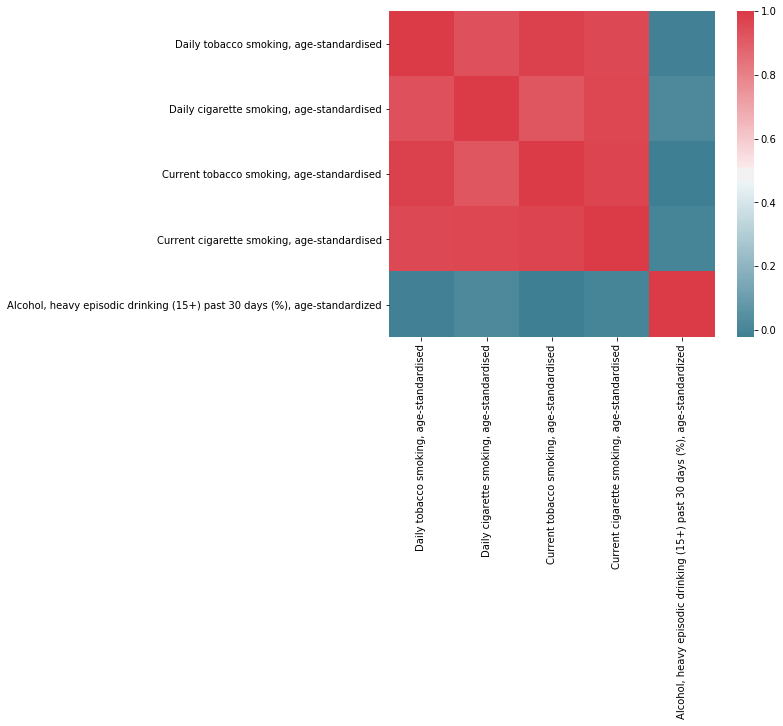

In [28]:
x = df_behrisk.iloc[:,1:6]
corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [29]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### NCD Risk Factor

In [30]:
df_perv=df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]

In [35]:
## remove duplicates of Congo

df_perv[(df_perv['Indicator']=='Asthma prevalence rate')&( df_perv['Country']=='Congo')]
df_perv.drop([6367], inplace=True)


df_perv[df_perv['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']['Country'].nunique()
df_perv.drop([6563], inplace=True)

df_perv[df_perv['Indicator']=='Chronic respiratory diseases prevalence rate']['Country'].nunique()
df_perv.drop([6758], inplace=True)

df_perv[df_perv['Indicator']=='Pneumoconiosis prevalence rate']['Country'].nunique()
df_perv.drop([7165], inplace=True)



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is 

In [36]:
#exclude pne cz it is percentage
print('all 0 for the indicator: Other chronic respiratory diseases prevalence rate so will drop this indicator as no info is there')
df_perv[df_perv['Indicator']=='Other chronic respiratory diseases prevalence rate']
dropi = df_perv[df_perv['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df_perv.drop(dropi, inplace=True)

all 0 for the indicator: Other chronic respiratory diseases prevalence rate so will drop this indicator as no info is there


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
df_ncd=pd.DataFrame()
irange = df_perv['Indicator'].unique()
df_perv.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)


print(irange)
for i in irange:

    pivot = df_perv[df_perv['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    df_ncd [i] = pivot[i]
    


df_ncd

['Asthma prevalence rate'
 'Chronic obstructive pulmonary disease prevalence rate'
 'Chronic respiratory diseases prevalence rate'
 'Pneumoconiosis prevalence rate']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Pneumoconiosis prevalence rate
0,Afghanistan,5520.271311,2469.099987,7642.147073,2.058286
1,Albania,2997.681117,6006.422879,8591.616027,10.350787
2,Algeria,5538.954664,3244.627805,8362.724221,3.654775
3,American Samoa,10523.876750,3124.340929,12777.207680,6.501375
4,Andorra,6255.701893,5819.334315,11420.807580,0.227133
5,Angola,5385.893848,1334.181789,6508.420172,1.463972
6,Antigua and Barbuda,6542.797093,2206.434387,8412.348545,1.374471
7,Argentina,4390.674756,4076.110372,8110.212322,2.086866
8,Armenia,3592.019303,5253.235903,8561.551610,3.751240
9,Australia,9413.838825,4734.496904,13265.601070,3.309778


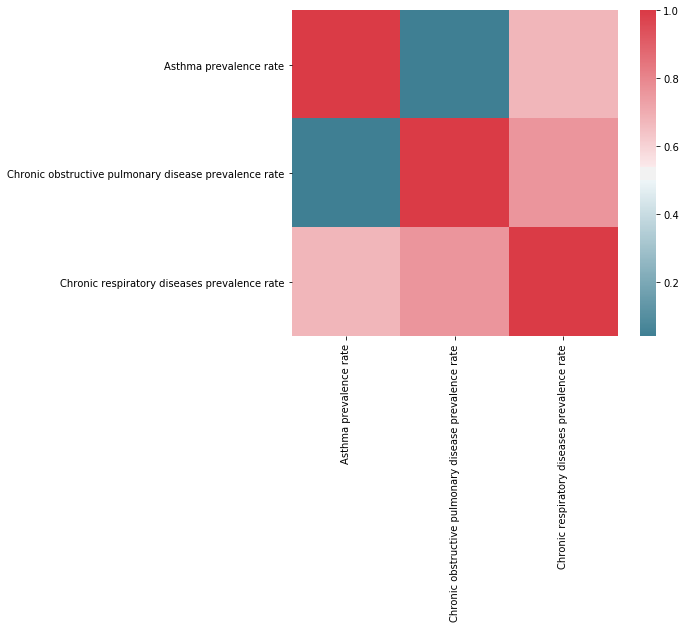

In [39]:
x =  df_ncd.iloc[:,1:4]
x.head()
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [40]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### Missing countries

In [93]:
a = df[(df['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)')  & ( df['Year']==2016)
      ]#    190


b = df[(df['Indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)')          & (df['Year'] ==2016)]


c = df[(df['Indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'  )                 & (df['Year'] ==2015 ) ]

d = df[(df['Indicator'] == 'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years') & (df['Year']==2014 ) 
      ]
e=a

In [ ]:
#e = df[(df['Indicator']=='Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']== 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)' )    & ( df['Year']==2016) ]         
#e = df[(df['Indicator']== 'Current cigarette smoking, age-standardised')  & ( df['Year']==2013)   ]
#e = df[(df['Indicator']==  'Current tobacco smoking, age-standardised')     & ( df['Year']==2013)]                                             
#e = df[(df['Indicator']==  'Daily cigarette smoking, age-standardised')       & ( df['Year']==2013)  ]                             
e = df[(df['Indicator']==  'Daily tobacco smoking, age-standardised')       & ( df['Year']==2013)  ]   
e

In [ ]:
#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2020)  ]  

In [94]:
set_country = e['Country'].unique()
set_country =  pd.DataFrame(set_country,columns=['Country'])
complete_country =df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]['Country'].unique()
complete_country=pd.DataFrame(complete_country,columns=['Country'])
#x = pd.concat([set_country, complete_country])
#y = x.drop_duplicates(keep=False, inplace=False)
#y

m = complete_country[~complete_country['Country'].isin(set_country['Country'])]
#Behavioral Risk Factor 

,Country
28,Cabo Verde
39,Cook Islands
44,Czechia
57,Eswatini
117,Nauru
124,Niue
128,Palau
143,Saint Kitts and Nevis
175,Tuvalu


In [ ]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(m)

## Methods to assign scores

### Percentage Binning

In [ ]:
""" ## 2017 data chosen
df=df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]
df['Disaggregation'].unique()
## remove duplicates of Congo
df[df['Indicator']=='Asthma prevalence rate']['Country'].nunique()
dp=df[df['Indicator']=='Asthma prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6367], inplace=True)


df[df['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6563], inplace=True)

df[df['Indicator']=='Chronic respiratory diseases prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Chronic respiratory diseases prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6758], inplace=True)

df[df['Indicator']=='Pneumoconiosis prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Pneumoconiosis prevalence rate']
dp[dp['Country']=='Congo']
df.drop([7165], inplace=True)
print('all 0 for the indicator: Other chronic respiratory diseases prevalence rate so will drop this indicator as no info is there')
df[df['Indicator']=='Other chronic respiratory diseases prevalence rate']
dropi = df[df['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df.drop(dropi, inplace=True)"""

In [87]:

c = df_ncd.iloc[:,0]
df_ncd = df_ncd.iloc[:,1:4]

In [66]:
"""df_ncd=pd.DataFrame()
irange = df['Indicator'].unique()
df.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)


for i in irange:

    pivot = df[df['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    df_ncd [i] = pivot[i]
    

df_ncd = df_ncd.set_index('Country')
df_ncd = df_ncd.iloc[:,0:3]
df_ncd
 """


"df_ncd=pd.DataFrame()\nirange = df['Indicator'].unique()\ndf.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)\n\n\nfor i in irange:\n\n    pivot = df[df['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')\n    pivot.reset_index(inplace=True)\n    pivot.columns =['Country', i]\n    df_ncd['Country']=pivot['Country']\n    df_ncd [i] = pivot[i]\n    \n\ndf_ncd = df_ncd.set_index('Country')\ndf_ncd = df_ncd.iloc[:,0:3]\ndf_ncd\n "

In [60]:
qt = df_ncd.quantile([.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])
qt

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate
0.1,3126.645501,1492.849325,4901.256075
0.2,3408.827396,1841.480321,5734.883690
0.3,3797.558609,2205.271818,6352.331379
0.4,4172.810457,2689.453156,7095.647589
0.5,4624.548553,3037.251289,7895.822310
0.6,5061.977852,3409.192267,8737.381272
0.7,5427.108594,4210.077151,9704.144244
0.8,6410.425313,5841.020325,11256.259790
0.9,7520.879333,6478.024228,12322.973105
1.0,12095.018780,10643.456040,15356.234020


In [89]:
perc=pd.DataFrame()
l = df_ncd.shape[0]

for i in range(0,3):
    binn = []
    for j in range(0,l ):
        for q in range (0,10):
            if df_ncd.iloc[j,i]<=qt.iloc[q,i]:
                binn.append(q+1)
                break
    perc[i] = binn
perc.columns = df_ncd.columns
perc['Country']=c
            

In [90]:
perc

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Country
0,8,4,5,Afghanistan
1,1,9,6,Albania
2,8,6,6,Algeria
3,10,6,10,American Samoa
4,8,8,9,Andorra
5,7,1,4,Angola
6,9,4,6,Antigua and Barbuda
7,5,7,6,Argentina
8,3,8,6,Armenia
9,10,8,10,Australia


In [67]:
""" df_ncd.reset_index(inplace=True)
perc['Country']= df_ncd['Country'] 
perc.head()"""

" df_ncd.reset_index(inplace=True)\nperc['Country']= df_ncd['Country'] \nperc.head()"

In [91]:
print(perc['Asthma prevalence rate'].value_counts())
print(perc['Chronic obstructive pulmonary disease prevalence rate'].value_counts())
print(perc['Chronic respiratory diseases prevalence rate'].value_counts())
perc[perc['Chronic respiratory diseases prevalence rate']==7]

10    20
7     20
4     20
1     20
9     19
8     19
6     19
5     19
3     19
2     19
Name: Asthma prevalence rate, dtype: int64
10    20
7     20
4     20
1     20
9     19
8     19
6     19
5     19
3     19
2     19
Name: Chronic obstructive pulmonary disease prevalence rate, dtype: int64
10    20
7     20
4     20
1     20
9     19
8     19
6     19
5     19
3     19
2     19
Name: Chronic respiratory diseases prevalence rate, dtype: int64


,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Country
12,9,4,7,Bahamas
16,4,9,7,Belarus
18,10,3,7,Belize
51,9,5,7,Dominica
54,8,6,7,Egypt
65,3,9,7,Georgia
70,9,6,7,Grenada
76,9,4,7,Haiti
87,9,4,7,Jamaica
88,5,7,7,Japan


In [ ]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(perc)

### Check Distribution

In [ ]:
## 2017 data chosen
df=df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]

In [ ]:
## remove duplicates of Congo

df[df['Indicator']=='Asthma prevalence rate']['Country'].nunique()
dp=df[df['Indicator']=='Asthma prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6367], inplace=True)


df[df['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6563], inplace=True)

df[df['Indicator']=='Chronic respiratory diseases prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Chronic respiratory diseases prevalence rate']
dp[dp['Country']=='Congo']
df.drop([6758], inplace=True)

df[df['Indicator']=='Pneumoconiosis prevalence rate']['Country'].nunique()
dp = df[df['Indicator']=='Pneumoconiosis prevalence rate']
dp[dp['Country']=='Congo']
df.drop([7165], inplace=True)

In [ ]:
print('all 0 for the indicator: Other chronic respiratory diseases prevalence rate so will drop this indicator as no info is there')
df[df['Indicator']=='Other chronic respiratory diseases prevalence rate']

In [ ]:
dropi = df[df['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df.drop(dropi, inplace=True)

In [ ]:
df_ncd=pd.DataFrame()
irange = df['Indicator'].unique()
df.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)


print(irange)
for i in irange:

    pivot = df[df['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    df_ncd [i] = pivot[i]
    


df_ncd

In [ ]:
#exclude pne cz it is percentage
x =  df_ncd.iloc[:,1:4]
x.head()

In [ ]:
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = x.corr()
print(corr.style.background_gradient(cmap='coolwarm').set_precision(2))

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
from sklearn import preprocessing

#X_scaled = preprocessing.scale(x)
#X_scaled

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled= min_max_scaler.fit_transform(x)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params,best_sse)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


In [ ]:
# Load data from statsmodels datasets
data = pd.DataFrame(X_scaled)
#data =data.iloc[:,1]
data['sum'] = data.sum(axis=1)
data = data['sum']
data.head()


In [ ]:
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params, best_sse = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
best_sse

In [ ]:
import scipy
size=len(data)
y_std = data
dist_names = ['mielke',
              'burr',
              'beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)

In [ ]:
import scipy
## qq and pp plots
data = data.copy()
data.sort()


# Loop through selected distributions (as previously selected)
#['burr']
dist_names = ['mielke',
              'burr', 'beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

for distribution in dist_names:
    # Set up distribution
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(data)
    
    # Get random numbers from distribution
    norm = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = size)
    norm.sort()
    
    # Create figure
    fig = plt.figure(figsize=(8,5)) 
    
    # qq plot
    ax1 = fig.add_subplot(121) # Grid of 2x2, this is suplot 1
    ax1.plot(norm,data,"o")
    min_value = np.floor(min(min(norm),min(data)))
    max_value = np.ceil(max(max(norm),max(data)))
    ax1.plot([min_value,max_value],[min_value,max_value],'r--')
    ax1.set_xlim(min_value,max_value)
    ax1.set_xlabel('Theoretical quantiles')
    ax1.set_ylabel('Observed quantiles')
    title = 'qq plot for ' + distribution +' distribution'
    ax1.set_title(title)
    
    # pp plot
    ax2 = fig.add_subplot(122)
    
    # Calculate cumulative distributions
    bins = np.percentile(norm,range(0,101))
    data_counts, bins = np.histogram(data,bins)
    norm_counts, bins = np.histogram(norm,bins)
    cum_data = np.cumsum(data_counts)
    cum_norm = np.cumsum(norm_counts)
    cum_data = cum_data / max(cum_data)
    cum_norm = cum_norm / max(cum_norm)
    
    # plot
    ax2.plot(cum_norm,cum_data,"o")
    min_value = np.floor(min(min(cum_norm),min(cum_data)))
    max_value = np.ceil(max(max(cum_norm),max(cum_data)))
    ax2.plot([min_value,max_value],[min_value,max_value],'r--')
    ax2.set_xlim(min_value,max_value)
    ax2.set_xlabel('Theoretical cumulative distribution')
    ax2.set_ylabel('Observed cumulative distribution')
    title = 'pp plot for ' + distribution +' distribution'
    ax2.set_title(title)
    
    # Display plot    
    plt.tight_layout(pad=4)
    plt.show()

In [ ]:
X_scaled

In [ ]:
maxV = data.max()
minV = data.min()

score=[]
for i in data:
    index = 10*(i-minV)/(maxV-minV)
    score.append(index)

df_ncd['Score']=score
df_ncd

### Add labels: above/below average

In [ ]:
df_17= df[df['Year']==2017]

In [ ]:
print('all 0 for the indicator: Other chronic respiratory diseases prevalence rate so will drop this indicator as no info is there')
df_17[df_17['Indicator']=='Other chronic respiratory diseases prevalence rate']

In [ ]:
dropi = df_17[df_17['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df_17.drop(dropi, inplace=True)


In [ ]:
df_17_ncd = df_17[df_17['Groups']== 'NCD Prevalence Rate' ]

In [ ]:
print('for risk factor NCD Prevalence Rate, all data is aggregated by: ')
df_17_ncd['Disaggregation'].unique()

In [ ]:
# elimnate Congo duplicates
df_17_ncd[df_17_ncd['Indicator']=='Asthma prevalence rate']['Country'].nunique()
dp=df_17_ncd[df_17_ncd['Indicator']=='Asthma prevalence rate']
dp[dp['Country']=='Congo']
df_17_ncd.drop([6367], inplace=True)


df_17_ncd[df_17_ncd['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']['Country'].nunique()
dp = df_17_ncd[df_17_ncd['Indicator']=='Chronic obstructive pulmonary disease prevalence rate']
dp[dp['Country']=='Congo']
df_17_ncd.drop([6563], inplace=True)

df_17_ncd[df_17_ncd['Indicator']=='Chronic respiratory diseases prevalence rate']['Country'].nunique()
dp = df_17_ncd[df_17_ncd['Indicator']=='Chronic respiratory diseases prevalence rate']
dp[dp['Country']=='Congo']
df_17_ncd.drop([6758], inplace=True)

df_17_ncd[df_17_ncd['Indicator']=='Pneumoconiosis prevalence rate']['Country'].nunique()
dp = df_17_ncd[df_17_ncd['Indicator']=='Pneumoconiosis prevalence rate']
dp[dp['Country']=='Congo']
df_17_ncd.drop([7165], inplace=True)


In [ ]:
l=[]
df_17_ncd.sort_values(by='Indicator', ascending=False,inplace=True)
irange = df_17_ncd['Indicator'].unique()
for i in irange:

    pivot = df_17_ncd[df_17_ncd['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    #print(pivot)
    avg =  pivot[i].mean()
    print('Average of ',i,' is ', avg)
    df_17_ncd_i = df_17_ncd[df_17_ncd['Indicator']==i]

    for c,d in zip(df_17_ncd_i['Country'],df_17_ncd_i['Data']):
        
        if d>= avg:
            label = '1' #above avg
        else:
            label='0'
        l.append(label)
        #print(i,d,avg,label)

df_17_ncd['Label']=l    
df_17_ncd['Label'] = df_17_ncd['Label'].astype('int64')

In [ ]:
df_17_ncd.head()

In [ ]:
result = df_17_ncd.pivot(index='Country', columns='Indicator', values='Label' )
result['Total'] = result.sum(axis=1)
result.sort_values(by='Total', ascending=False,inplace=True)
result.reset_index(inplace=True)
result.groupby(['Total'])['Country'].nunique()

#groupby(['Groups','Indicator', 'Year'])['Country'].nunique()

## Max Min score (ex: asthma)

In [ ]:
df_asthma17=df[(df['Indicator']=='Asthma prevalence rate') & (df['Year']==2017)]
df_asthma17.head()

In [ ]:
df_asthma17['Disaggregation'].unique()

In [ ]:
#df_2017=df[df['Year']>=2017]
#df_2017.groupby(['Groups'])['Indicator'].nunique()

In [ ]:
maxV = df_asthma17['Data'].max()
minV = df_asthma17['Data'].min()

score=[]
for i in df_asthma17['Data']:
    index = 10*(i-minV)/(maxV-minV)
    score.append(index)

df_asthma17['Score']=score
df_asthma17

In [ ]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(df_asthma17)

In [ ]:
df.pivot(index='Indicator', columns='Disaggregation', values='Data')

In [ ]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(result)